In [4]:
from src import utils
from omegaconf import OmegaConf
import matplotlib.pylab as plt
from src.train_model import get_prediction, evaluate_model
from src.error_analysis import error_analysis
from xgboost import plot_importance
import matplotlib.pyplot as plt
import matplotlib as mpl

# Config file
cfg = OmegaConf.load("..\config\main.yaml")

# Load data
data = utils.load_data(cfg)

# Load model
model = utils.load_model(data, cfg)

# Return model predictions
prediction = get_prediction(model, data)

# Return evaluation
results = evaluate_model(prediction, data)

# Create a DataFrame of predictions and true values
df_preds = data['y_test'].assign(y_pred=prediction)

# Extract the true values and predicted values as separate variables
y_true = df_preds['net_sales']
y_pred = df_preds['y_pred']

# Calculate the errors (residuals) between the true and predicted values
errors = y_true - y_pred

In [5]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5685484012286326, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2503544517109346, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.06746773636110392, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

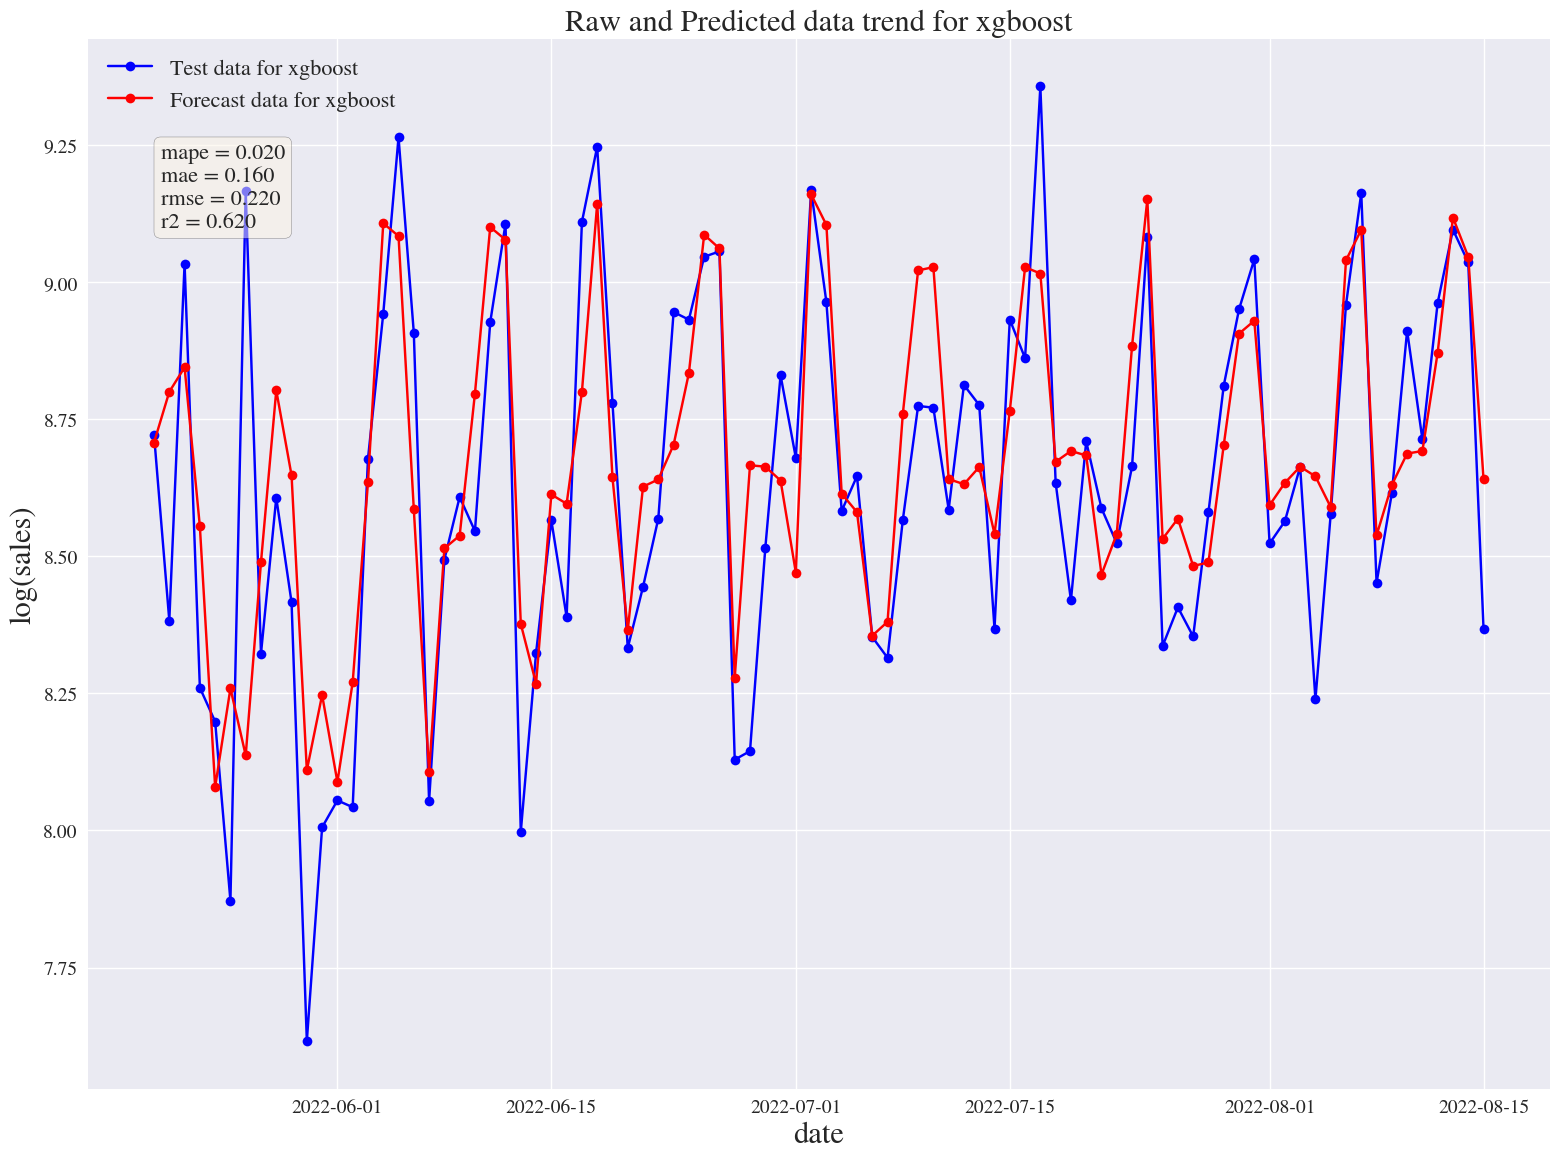

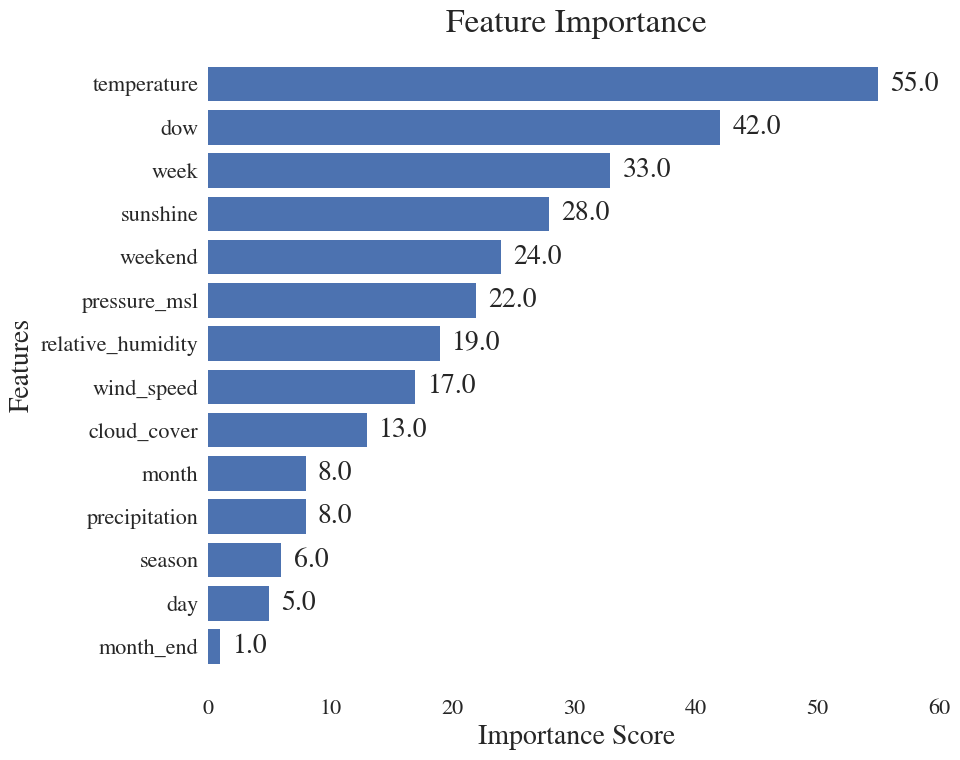

Number of errors: 88
Mean of errors: -0.0397
Standard deviation of errors: 0.2126
Quantiles of errors: 25%=-0.1731, 50%=-0.0330, 75%=0.0756
Min/Max errors: -0.5213/1.0289
Number of outliers: 1

Outliers:
>> 2022-05-26: 9.166


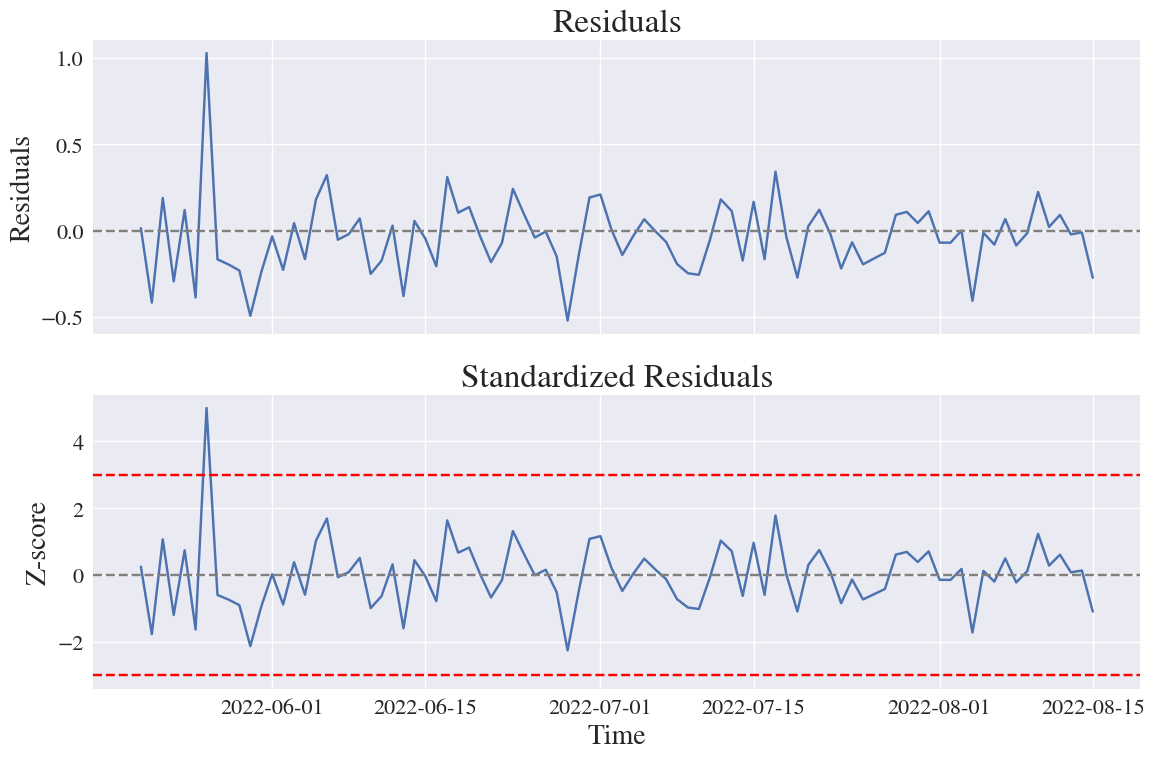

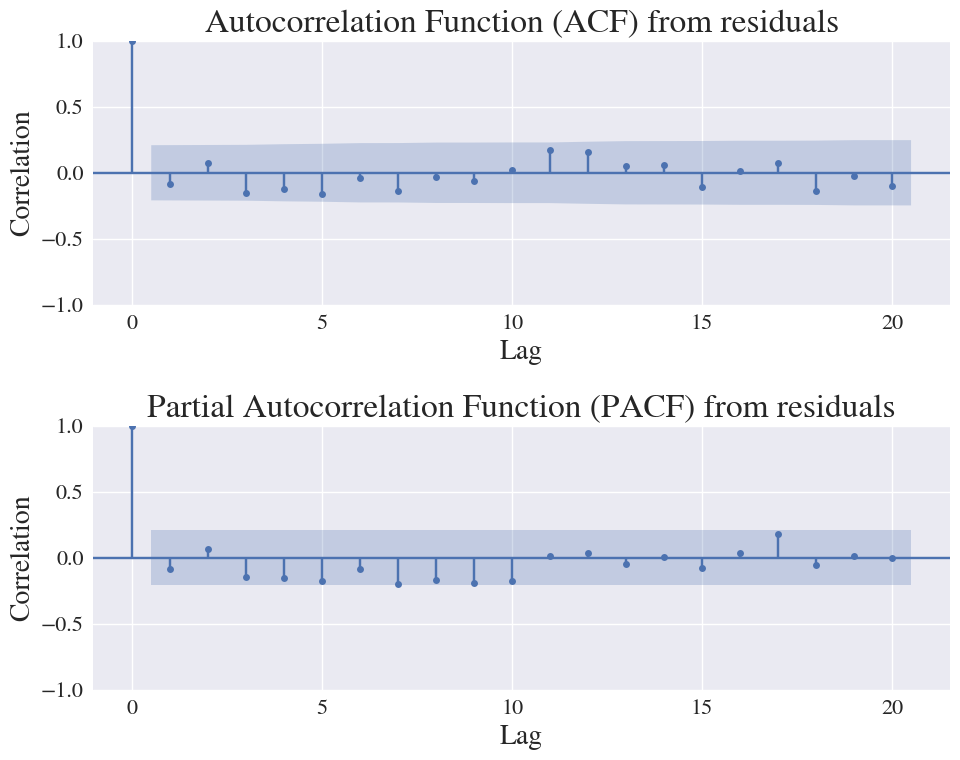

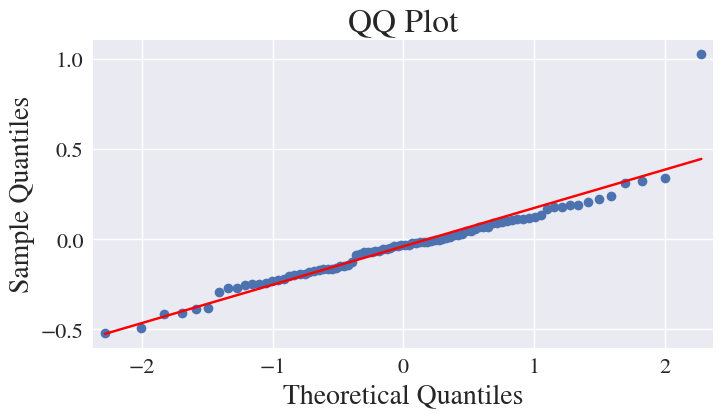

Top 3 highest absolute error values:
2022-05-26: 1.029
2022-06-28: 0.521
2022-05-30: 0.494


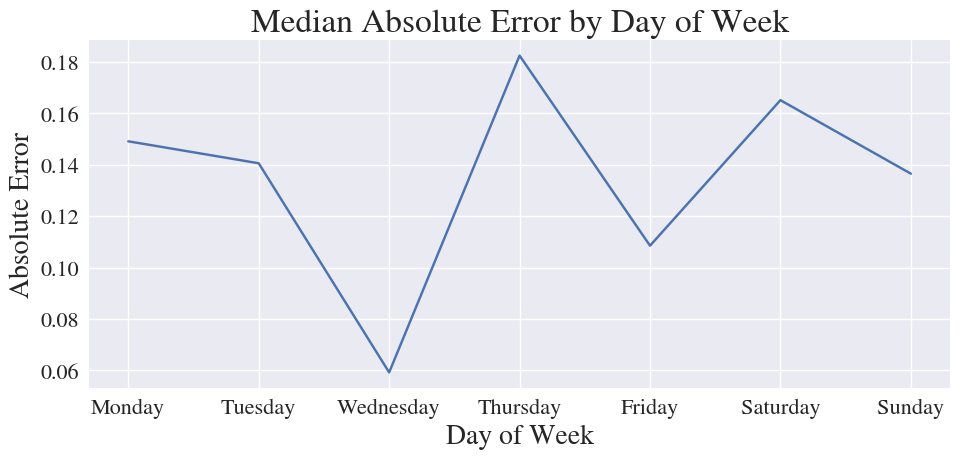

In [6]:
error_analysis(prediction, data, results, model)